In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np 

In [2]:
# Load dataset
df = pd.read_csv("dataset.csv")
df = df.dropna()
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [3]:
# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    if col != 'Salary':
        df[col] = le.fit_transform(df[col])

In [4]:
# Features and target
X = df[['Age', 'Education Level', 'Years of Experience']]
y = df['Salary']
X

,Age,Education Level,Years of Experience
0,32.0,0,5.0
1,28.0,1,3.0
2,45.0,2,15.0
3,36.0,0,7.0
4,52.0,1,20.0
...,...,...,...
370,35.0,0,8.0
371,43.0,1,19.0
372,29.0,0,2.0
373,34.0,0,7.0


In [5]:
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: Salary, Length: 373, dtype: float64

In [6]:
# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [9]:
lr_pred

array([167511.31373612,  97167.8379975 , 127812.0980707 ,  86096.11671836,
       156439.59245697, 162080.80767304, 161659.38936707,  99051.88391308,
        54476.30026189, 103019.76236655, 143483.82526225, 156018.17415101,
        36022.96015313,  85120.56033509, 122935.73008493,  54476.30026189,
        62555.69947084,  52703.07018814,  73838.12990296,  94175.51592731,
       123357.14839089, 103019.76236655, 160407.47091044,  65758.73069402,
        86096.11671836,  53711.4530316 , 168486.87011939,  42429.02259948,
       122381.59200762, 146619.78963446,  44867.20659236, 128022.80722368,
        51273.26903872, 154766.25569438,  93964.80677433,  22756.59049427,
       179004.45332122,  48835.08504583, 158877.77644986,  56914.48425478,
        48835.08504583,  88323.59155826, 168973.94134573, 162634.94575034,
        42429.02259948, 157204.43968726, 119389.26993743,  53922.16218458,
        45632.05382265,  42429.02259948, 153025.85208082,  76276.31389585,
       120497.54609204, 1

In [10]:
lr

LinearRegression()

In [11]:
# Model 2: Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [12]:
rf

RandomForestRegressor(random_state=42)

In [13]:
rf_pred

array([175153.33333333,  95716.54761905, 130500.        ,  97845.        ,
       161192.42424242, 167615.995671  , 140828.57142857,  99771.42857143,
        51204.06790105, 106951.19047619, 139532.73809524, 139983.33333333,
        40676.25      ,  80924.76190476, 129650.        ,  51204.06790105,
        53034.52380952,  44200.        ,  90588.57142857, 100441.94305694,
       102806.66666667, 106951.19047619, 155089.22438672,  61330.68764569,
        97845.        ,  54692.22222222, 155408.57142857,  40010.        ,
       105266.54761905, 164916.66666667,  46660.97402597, 124549.4047619 ,
        48162.91666667, 148895.77380952,  97083.87445887,  39041.66666667,
       169175.        ,  40000.        , 159575.75757576,  59564.65367965,
        40000.        ,  98838.92857143, 152145.23809524, 176730.49422799,
        40010.        , 171590.51948052, 116025.        ,  43435.73412698,
        40000.        ,  40010.        , 163850.        ,  89284.3513431 ,
       127943.33333333,  

In [14]:
# Evaluation
def evaluate(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("MAE:", round(mean_absolute_error(y_true, y_pred), 2))
    print("MSE:", round(mean_squared_error(y_true, y_pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))
    print("R²:", round(r2_score(y_true, y_pred), 2))

evaluate("Linear Regression", y_test, lr_pred)
evaluate("Random Forest", y_test, rf_pred)


Linear Regression Performance:
MAE: 11328.01
MSE: 262458894.43
RMSE: 16200.58
R²: 0.89

Random Forest Performance:
MAE: 11368.75
MSE: 326159820.68
RMSE: 18059.9
R²: 0.86


In [15]:
# Select best model
best_model = rf if r2_score(y_test, rf_pred) > r2_score(y_test, lr_pred) else lr
print("\nSelected Model:", type(best_model).__name__)

# Save model and scaler
with open("salary_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully!")


Selected Model: LinearRegression
Model and scaler saved successfully!


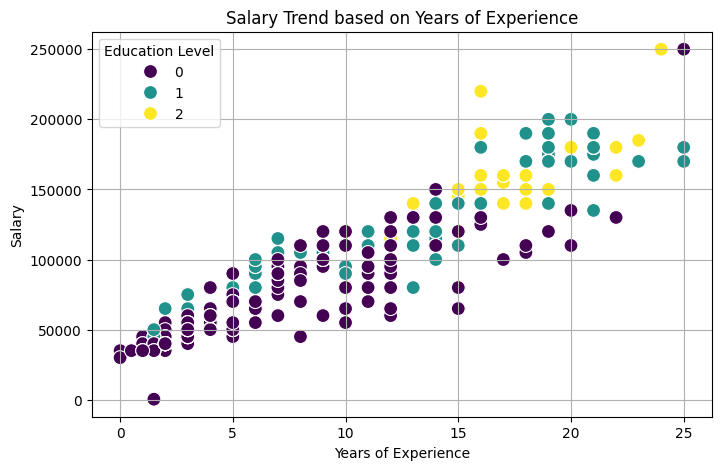

In [16]:

# Salary Trend Visualization
# =========================
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Years of Experience'], y=df['Salary'], hue=df['Education Level'], palette="viridis", s=100)
plt.title("Salary Trend based on Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend(title="Education Level")
plt.grid(True)
plt.show()